In [1]:
!uv pip install langgraph

Using Python 3.11.10 environment at: /home/ubu/Documents/work/l4t/langchain-langgraph-python/.venv
Audited 1 package in 1ms


In [2]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict, Annotated
from IPython.display import Image, display

In [3]:
class State(TypedDict):
    number1: int
    number2: int 
    result: int 

graph = StateGraph(State)

def add(state: State) -> State:
    result = state["number1"] + state["number2"]
    return { "result": result } 


def show(state: State) -> None:
    print(f"Addition of {state['number1']} & {state['number2']} is {state['result']}")


graph.add_node('add', add)
graph.add_node('show', show)

graph.add_edge(START, 'add')
graph.add_edge('add', 'show')
graph.add_edge('show', END)

compiled = graph.compile()

compiled.invoke({"number1":1, "number2":2})

Addition of 1 & 2 is 3


{'number1': 1, 'number2': 2, 'result': 3}

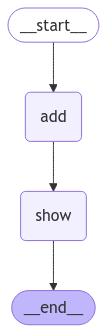

In [4]:

try:
    display(Image(compiled.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass